You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/Python_Crash_course_2020/EDA/EDA_Wage.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)




## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


___
## Prof. Pedram Jahangiry

# Explanatory Data Analysis: EDA
Exploratory data analysis [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)  is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Here is an [example.](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15)


First we need to import some libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  #if you want to use seaborn themes with matplotlib functions

## Data Preprocessing

In [7]:
df = pd.read_csv('wage.csv')
df.tail()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
930,52000.0,40,79,16,6,1,30,1,1,11.0,NaN
931,120200.0,40,102,13,10,3,31,1,0,8.0,6.0
932,53800.0,45,77,12,12,10,28,1,1,7.0,NaN
933,87300.0,44,109,12,12,12,28,1,0,NaN,11.0
934,100000.0,40,107,12,17,18,35,1,0,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


### Variable Type?
* Starting by counting the unique elements for each variable:

In [9]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'feduc'],
      dtype='object')

In [10]:
for col in df.columns:
    print(col, df[col].nunique())

wage 449
hours 37
IQ 80
educ 10
exper 22
tenure 23
age 11
married 2
black 2
meduc 19
feduc 18


In [11]:
# alternatively,
df.nunique()

wage       449
hours       37
IQ          80
educ        10
exper       22
tenure      23
age         11
married      2
black        2
meduc       19
feduc       18
dtype: int64

* apparantly *black* and *married* should be categorical variables and the rest of them be numerics.

* We can also  tabularize the variables of interest using value_counts() function from pandas.

In [12]:
for col in ['black', 'married']:
    print(df[col].value_counts())

0    815
1    120
Name: black, dtype: int64
1    835
0    100
Name: married, dtype: int64


Exercis: generate the same output as above using list comprehensions.


---

#### Defining the categorical and numeric variables:

In [14]:
categoricals =['black','married']
numerics     =['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age','meduc', 'feduc'] # instead of typing the name of all these variables, can you think of an easier way to do this?

In [ ]:
list(df.drop(['black','married'], axis=1).columns)

['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'meduc', 'feduc']

Changing categorical type variables in to category:

In [21]:
for col in categoricals:
    df[col]=df[col].astype("category")

Exercise: how to use apply and lambda for changing the type of variables in python (Chat GPT maybe?)

----

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    int64   
 2   IQ       935 non-null    int64   
 3   educ     935 non-null    int64   
 4   exper    935 non-null    int64   
 5   tenure   935 non-null    int64   
 6   age      935 non-null    int64   
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    857 non-null    float64 
 10  feduc    741 non-null    float64 
dtypes: category(2), float64(3), int64(6)
memory usage: 67.9 KB


In [23]:
for col in numerics:
    df[col]=df[col].astype("float")
    # alternatively we could have used pd.to_numeric(df[col], errors='coerce').

In [24]:
# again, alternatively:
df[numerics]= df[numerics].apply(lambda x: x.astype("float"))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    float64 
 2   IQ       935 non-null    float64 
 3   educ     935 non-null    float64 
 4   exper    935 non-null    float64 
 5   tenure   935 non-null    float64 
 6   age      935 non-null    float64 
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    857 non-null    float64 
 10  feduc    741 non-null    float64 
dtypes: category(2), float64(9)
memory usage: 67.9 KB


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,935.0,95794.545455,40436.082247,11500.0,66900.0,90500.0,116000.0,307800.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0
feduc,741.0,10.217274,3.300700,0.0,8.0,10.0,12.0,18.0


In [27]:
# hmmm? what about categorical variables?
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
wage,935.0,NaN,NaN,NaN,95794.545455,40436.082247,11500.0,66900.0,90500.0,116000.0,307800.0
hours,935.0,NaN,NaN,NaN,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,NaN,NaN,NaN,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,NaN,NaN,NaN,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,NaN,NaN,NaN,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,NaN,NaN,NaN,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,NaN,NaN,NaN,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
married,935.0,2.0,1.0,835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black,935.0,2.0,0.0,815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meduc,857.0,NaN,NaN,NaN,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0


### Handling missing variables

In [28]:
df.isnull().sum() / len(df)
# Alternatively we could use isnull() from pandas.
# pd.isnull(df).sum()

wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
meduc      0.083422
feduc      0.207487
dtype: float64

#### Plotting the NA values

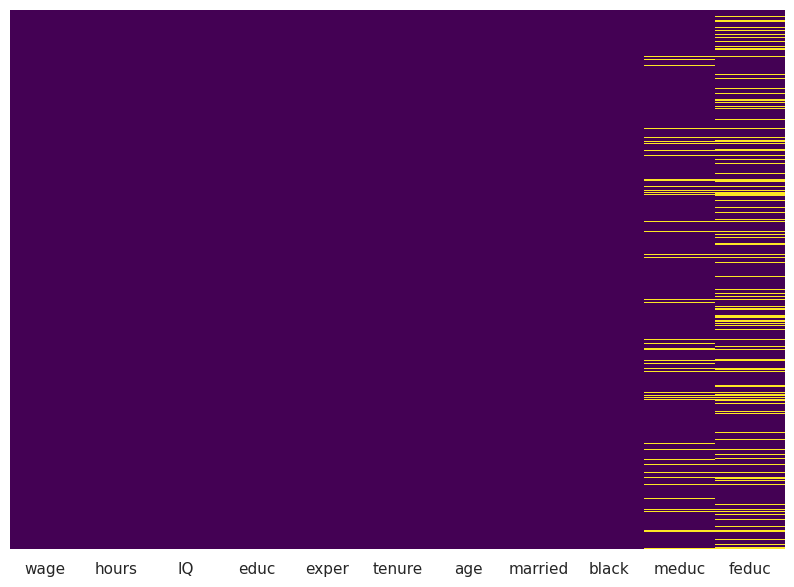

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

1. Because the number of NAs in feduc and meduc is greater that 5% of the observations, we should not keep them in the regression model. Alternatively we could do an imputation.

2. Here, let's drop the father education and impute the mother education.

In [30]:
df.drop('feduc', axis=1, inplace=True) #why do we need inplace?

In [31]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

* we will replace the missing meduc with median. since the data is left skewed, mean is not a good representation of the central tendency measure.

In [33]:
df['meduc'].fillna(df['meduc'].median(),axis=0, inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    float64 
 2   IQ       935 non-null    float64 
 3   educ     935 non-null    float64 
 4   exper    935 non-null    float64 
 5   tenure   935 non-null    float64 
 6   age      935 non-null    float64 
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    935 non-null    float64 
dtypes: category(2), float64(8)
memory usage: 60.6 KB


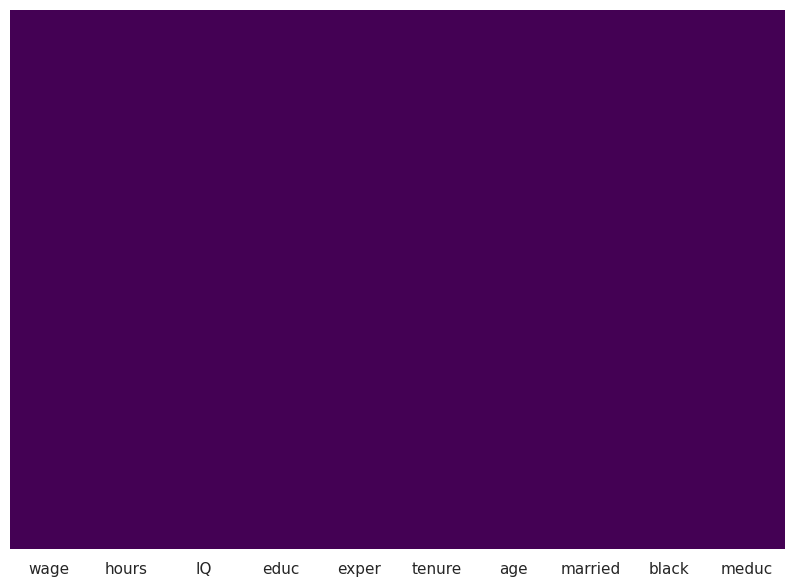

In [34]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

#### Save the data set:
Most commonly, the data sets are saved in a flat csv file but, here we will be saving our pre-processed data set into a Python pickle file because of the following reasons:

1. **Preservation of data types**: When saving data in a CSV file, all data is saved as strings, which can lead to data loss or inaccuracies if the data contains non-string types like integers or floats. Pickle, on the other hand, preserves the data types of the objects being saved, which means that the data can be reloaded exactly as it was saved.

2. **Handling of complex data structures**: CSV is a simple format that is best suited for storing simple data tables with rows and columns. Pickle, on the other hand, can handle more complex data structures like lists, dictionaries, and custom classes. So it's more versatile when it comes to handling different types of data.

3. **Efficiency**: Pickle is a binary format, which means that it is more efficient in terms of storage and loading time. CSV files are text files and are larger in size and take longer to read and write.


In [35]:
df.to_pickle("wage_clean.pkl")

### Data visualization

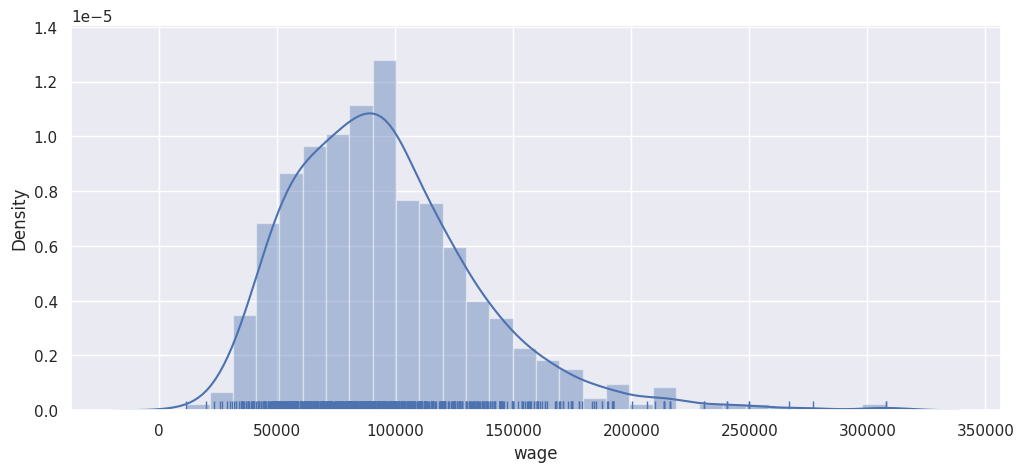

In [36]:
plt.figure(figsize=(12,5))
sns.distplot(df['wage'], bins=30 , rug=True)
plt.show()

**Challenge**: Can you replicate the follwoing histplot?

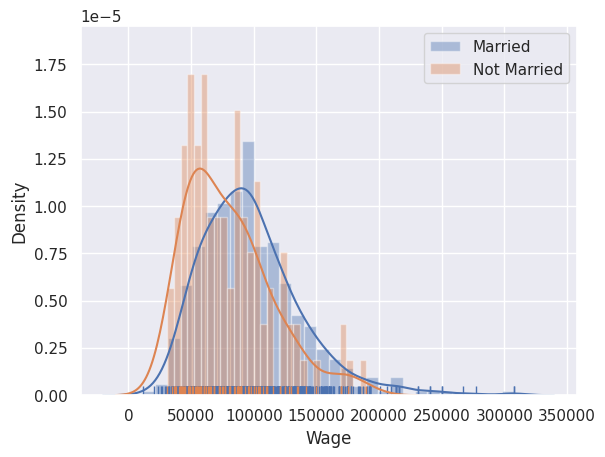

In [39]:
plt.show()

In [40]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

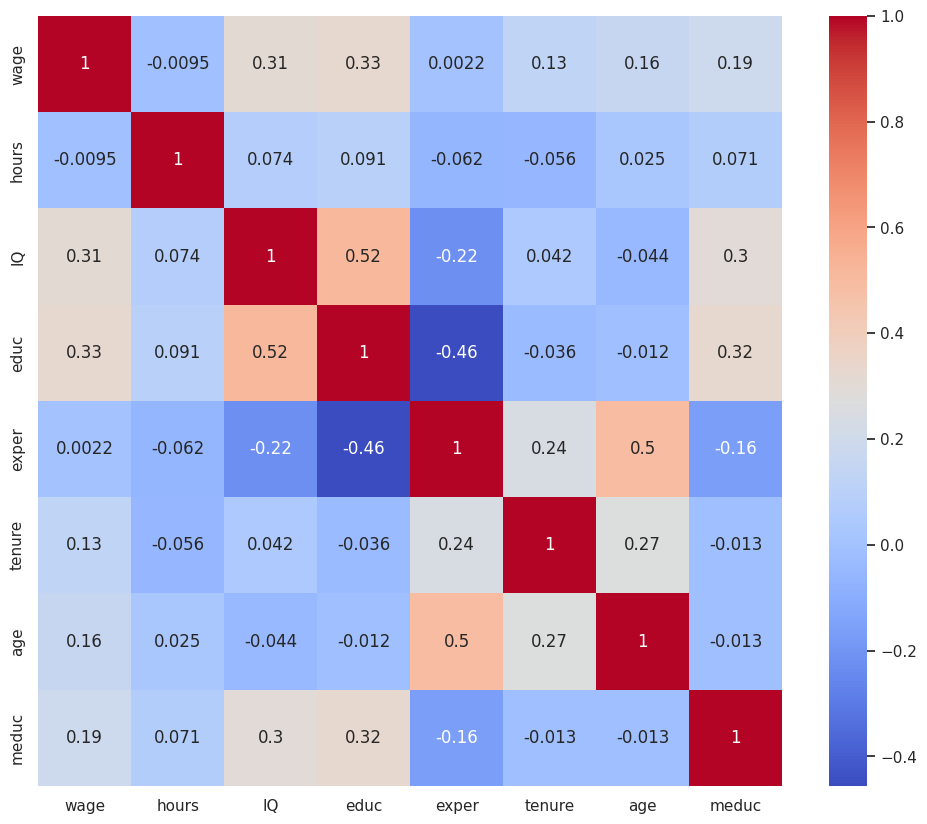

In [41]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

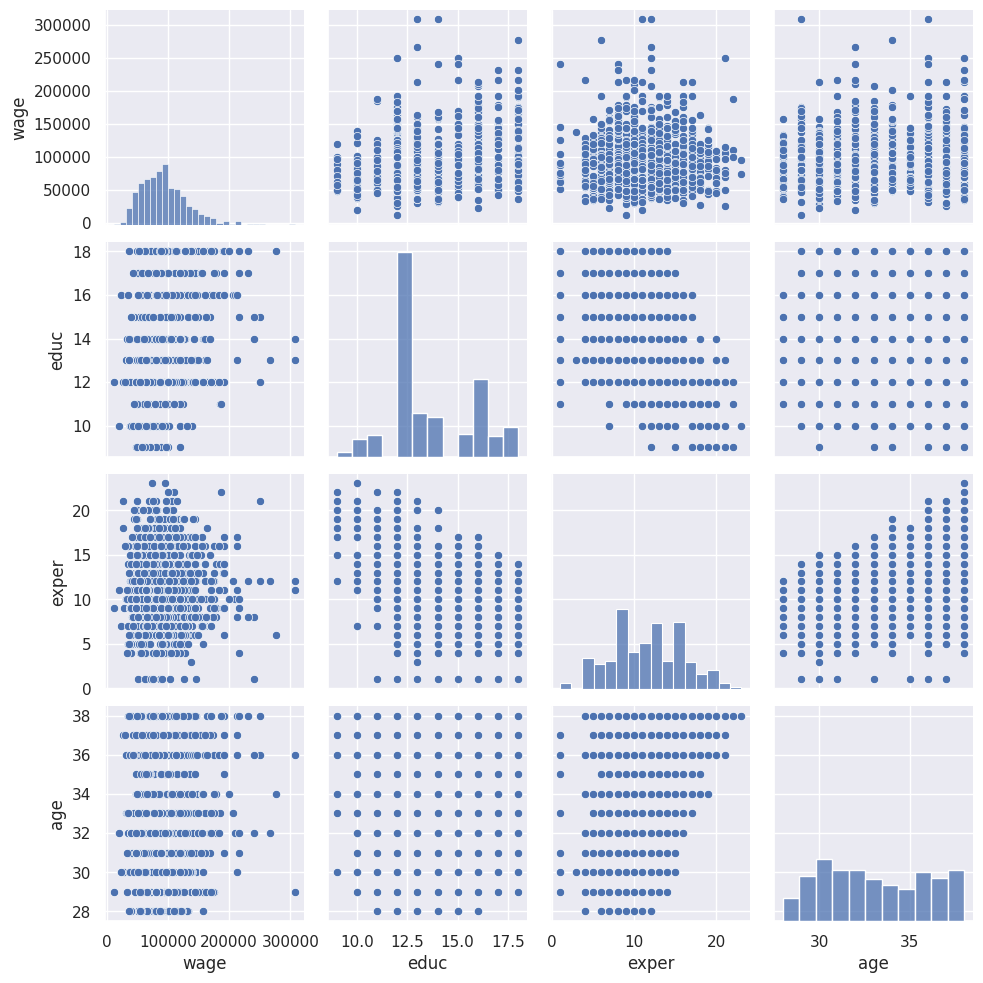

In [42]:
sns.pairplot(df, vars=['wage', 'educ','exper','age'])
plt.show()

### Exercise:
Try to plot the same pairplot for different categories of married vs non-married!

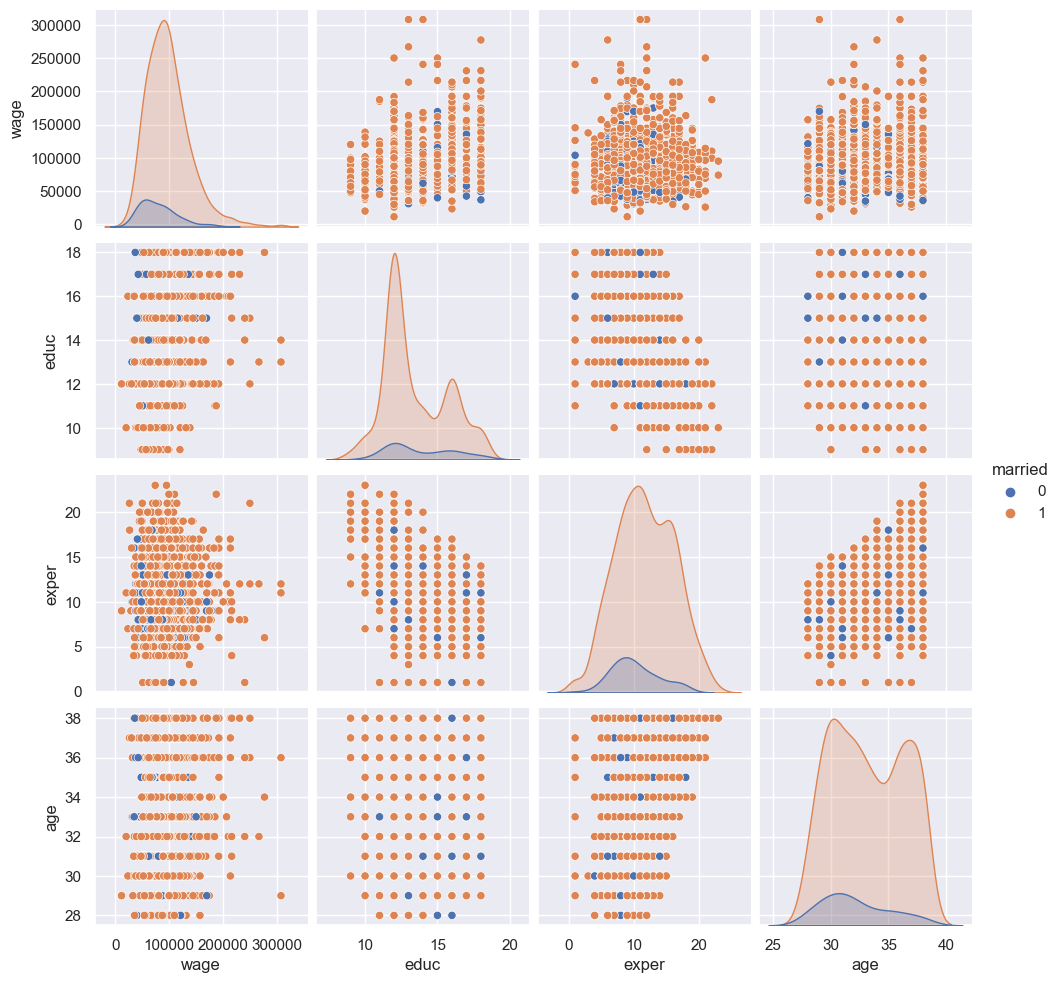

---

### Grouping the data based on different categories:

Let's summarize the data based on different categories using groupby() method and do some visualizations.

In [44]:
df.groupby(by='married').mean().round(1)

,wage,hours,IQ,educ,exper,tenure,age,meduc
married,,,,,,,,
0,79844.0,43.2,101.9,13.8,10.2,6.2,32.1,11.0
1,97704.8,44.0,101.2,13.4,11.7,7.4,33.2,10.8


In [45]:
df.groupby(by=['married', 'black']).mean().round(1)

wage  hours     IQ  educ  exper  tenure   age  meduc
married black                                                          
0       0       84197.6   43.5  105.2  14.1    9.8     6.7  32.0   11.1
        1       60011.1   42.1   86.8  12.8   11.9     3.9  32.8   10.4
1       0      100728.0   44.3  103.3  13.6   11.7     7.5  33.3   11.0
        1       75979.4   41.9   85.9  12.4   12.2     6.6  32.8    9.3

In [47]:
df.groupby(by="married").agg({'wage':['count','mean','median', 'min','max'],
                            'educ':['mean']}).round(1)

wage                                       educ
        count     mean   median      min       max  mean
married                                                 
0         100  79844.0  73600.0  31000.0  189900.0  13.8
1         835  97704.8  92900.0  11500.0  307800.0  13.4

----

Now let's do some group plots:

In [48]:
df_group_married = df.groupby(by=['married']).mean().reset_index()
df_group_married

,married,wage,hours,IQ,educ,exper,tenure,age,meduc
0,0,79844.000000,43.250000,101.920000,13.840000,10.220000,6.170000,32.12000,10.960000
1,1,97704.790419,44.010778,101.205988,13.423952,11.724551,7.361677,33.19521,10.772455


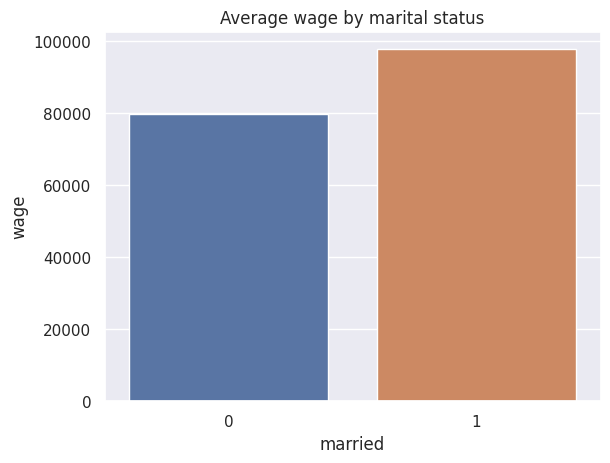

In [49]:
sns.barplot(y='wage', x='married', data=df_group_married)
plt.title('Average wage by marital status')
plt.show()

**Challenge**: replicate the following chart!

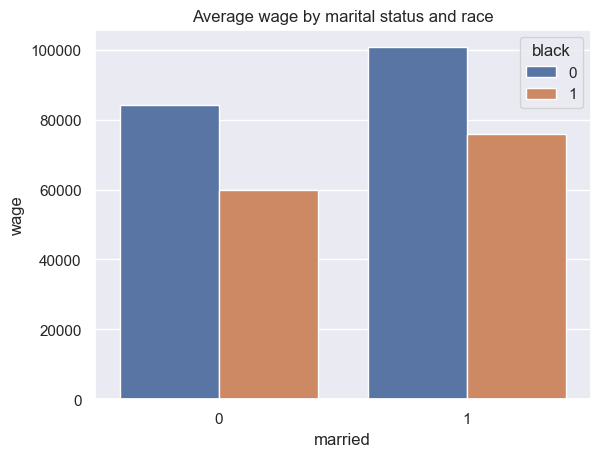

### Handling Dummy variables
This is not part of the EDA. We are going to use it later in the course.

In [50]:
df_dummy= pd.get_dummies(df, drop_first=True)
df_dummy.head()

,wage,hours,IQ,educ,exper,tenure,age,meduc,married_1,black_1
0,76900.0,40.0,93.0,12.0,11.0,2.0,31.0,8.0,1,0
1,80800.0,50.0,119.0,18.0,11.0,16.0,37.0,14.0,1,0
2,82500.0,40.0,108.0,14.0,11.0,9.0,33.0,14.0,1,0
3,65000.0,40.0,96.0,12.0,13.0,7.0,32.0,12.0,1,0
4,56200.0,40.0,74.0,11.0,14.0,5.0,34.0,6.0,1,0


in this example, since black and married are already dummy variables, we didn't need to do this.

### links:
1. What is EDA, Exploratory data analysis? https://en.wikipedia.org/wiki/Exploratory_data_analysis)
2. Python auto-visualization packages for EDA: https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae